# Referential integrity

## Referential integrity

* Correcting matching of corresponding entities across the schema
* Relies on entity integrity
* Enfornced by foreign keys

## Foreign keys
A foreign key is a column or several columns in the child table referencing the primary key column(s) in the parent table.

* More generally, foreign keys can reference other sets of columns than the primary key. However, in common practice and in this class foreign keys will always reference the primary key in the referenced table.


## Effects of a foreign key constraint
1. Restrict inserts into the child table if there is no match in parent.
2. Restrict deletes (and updates of primary key values) from the parent table when there is a match in child.
3. An index is created in the child table to speed up searches on the foreign key.

As a result, the child table is prevented from having values in its foreign keys columns in the absence of entries in the parent table with matching primary key values.

Importantly, unlike other types of links in other data models, no actual link is created between individual rows of both tables. Referential integrity is maintained by restricting dta manipulations.

## Diagramming notation 

- Entity-relationship diagram

## Examples

In [1]:
import datajoint as dj

schema = dj.Schema('person')

[2023-09-12 23:54:22,515][INFO]: Connecting root@fakeservices.datajoint.io:3306
[2023-09-12 23:54:22,522][INFO]: Connected root@fakeservices.datajoint.io:3306


In [2]:
@schema
class Title(dj.Lookup):
    definition = """
    title_code  : char(8)
    ---
    full_title : varchar(120)
    """
    
    contents = [
        ("SW-Dev1", "Software Developer 1"),
        ("SW-Dev2", "Software Developer 2"),
        ("SW-Dev3", "Software Developer 3"),
        ("Web-Dev1", "Web Developer 1"),
        ("Web-Dev2", "Web Developer 2"),
        ("Web-Dev3", "Web Developer 3"),
        ("HR-Mgr", "Human Resources Manager")
    ]

In [3]:
Title()

title_code,full_title
HR-Mgr,Human Resources Manager
SW-Dev1,Software Developer 1
SW-Dev2,Software Developer 2
SW-Dev3,Software Developer 3
Web-Dev1,Web Developer 1
Web-Dev2,Web Developer 2
Web-Dev3,Web Developer 3


In [4]:
@schema
class Person(dj.Manual):
    definition = """
    person_id  :  int 
    ---
    first_name : varchar(30)
    last_name : varchar(30)
    """

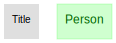

In [5]:
dj.Diagram(schema)

In [6]:
Person.insert1((1, "Bob", "Builder"))

In [7]:
@schema
class Department(dj.Lookup):
    definition = """
    dept_code : char(4) 
    --- 
    dept_name : varchar(200)   
    """

    contents = (
        ("BIOL", "Biology"),
        ("MATH", "Mathematics"),
        ("STAT", "Statistics"),
        ("ENG", "English")
        )

In [8]:
@schema
class Student(dj.Manual):
    definition = """
    -> Person
    ---
    -> Department
    """

In [9]:
@schema
class Employee(dj.Manual):
    definition = """
    -> Person
    ---
    -> Title
    """

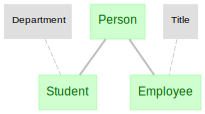

In [10]:
dj.Diagram(schema)

## Foreign keys have 4 effects
0. The primary key of the parent becomes part of the child definition (the foreign key)
1. Restrict inserts into child table if no match in parent
2. Restrict deletes from parent if there is a matching child 
3. Create an index in child to make searches fast on the value of the FK value.

In [11]:
Department()

dept_code,dept_name
BIOL,Biology
ENG,English
MATH,Mathematics
STAT,Statistics


In [12]:
Student()

person_id,dept_code


In [13]:
Person()

person_id,first_name,last_name
1,Bob,Builder


In [15]:
Student.insert1((1, "BIOL"))

In [16]:
@schema 
class Language(dj.Lookup):
    definition = """
    lang_code  : char(8)
    ---
    language : varchar(20)
    """
    
    contents = [
        ("Eng", "English"),
        ("Nav", "Navajo"),
        ("Fr", "French"),
        ("It", "Italian"),
        ("Sp", "Spanish"),
        ("Ar", "Arabic")        
    ]

In [18]:
Language()

lang_code,language
Ar,Arabic
Eng,English
Fr,French
It,Italian
Nav,Navajo
Sp,Spanish


In [17]:
@schema
class LanguageSkill(dj.Manual):
    definition = """
    -> Person
    -> Language
    ---
    skill_level  : enum("beginner", "intermediate", "fluent", "native")
    """

In [19]:
LanguageSkill()

person_id,lang_code,skill_level


In [24]:
LanguageSkill.insert1((1, "Sp", "fluent"))

In [26]:
LanguageSkill * Person * Language

person_id,lang_code,skill_level,first_name,last_name,language
1,Eng,beginner,Bob,Builder,English
1,Sp,fluent,Bob,Builder,Spanish


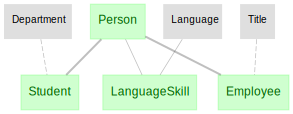

In [27]:
dj.Diagram(schema)